# SEED-V Dataset
In this notebook, we test the dataset, different splitting algoirthms for training, as well as visualize some samples from the dataset.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from datasets.seedv import SeedVDataset
from datasets.splitters import RandomSplitter, LNSOSplitter, KFoldSplitter

In [2]:
dataset = SeedVDataset(
    root='/data/SEED-V',
    h5file='seedv4s0o.h5',
)

## Split test
### Random Splitter

In [12]:
random_split = RandomSplitter(
    dataset=dataset,
    ratio=0.8,
    shuffle=True
)

rs_trainset = random_split.trainset
rs_testset = random_split.testset

In [13]:
assert len(dataset) == len(rs_trainset) + len(rs_testset)
len(dataset), len(rs_trainset), len(rs_testset)

(28973, 23178, 5795)

### Leave N Subjects Out (LNSO) Splitter

In [14]:
lnso_split = LNSOSplitter(
    dataset=dataset,
    num_participants=2,
    shuffle=True
)

lnso_trainset = lnso_split.trainset
lnso_testset = lnso_split.testset

In [15]:
assert len(dataset) == len(lnso_trainset) + len(lnso_testset)
len(dataset), len(lnso_trainset), len(lnso_testset)

(28973, 25265, 3708)

### K-fold Splitter

In [20]:
k = 10
kfold_split = KFoldSplitter(
    dataset=dataset,
    k=k,
    shuffle=True
)

for i in range(k):
    kfold_split.set_fold(i)
    kfold_trainset = kfold_split.trainset
    kfold_testset = kfold_split.testset

    assert len(dataset) == len(kfold_trainset) + len(kfold_testset)
    print(len(kfold_trainset), len(kfold_testset))

26075 2898
26075 2898
26075 2898
26076 2897
26076 2897
26076 2897
26076 2897
26076 2897
26076 2897
26076 2897


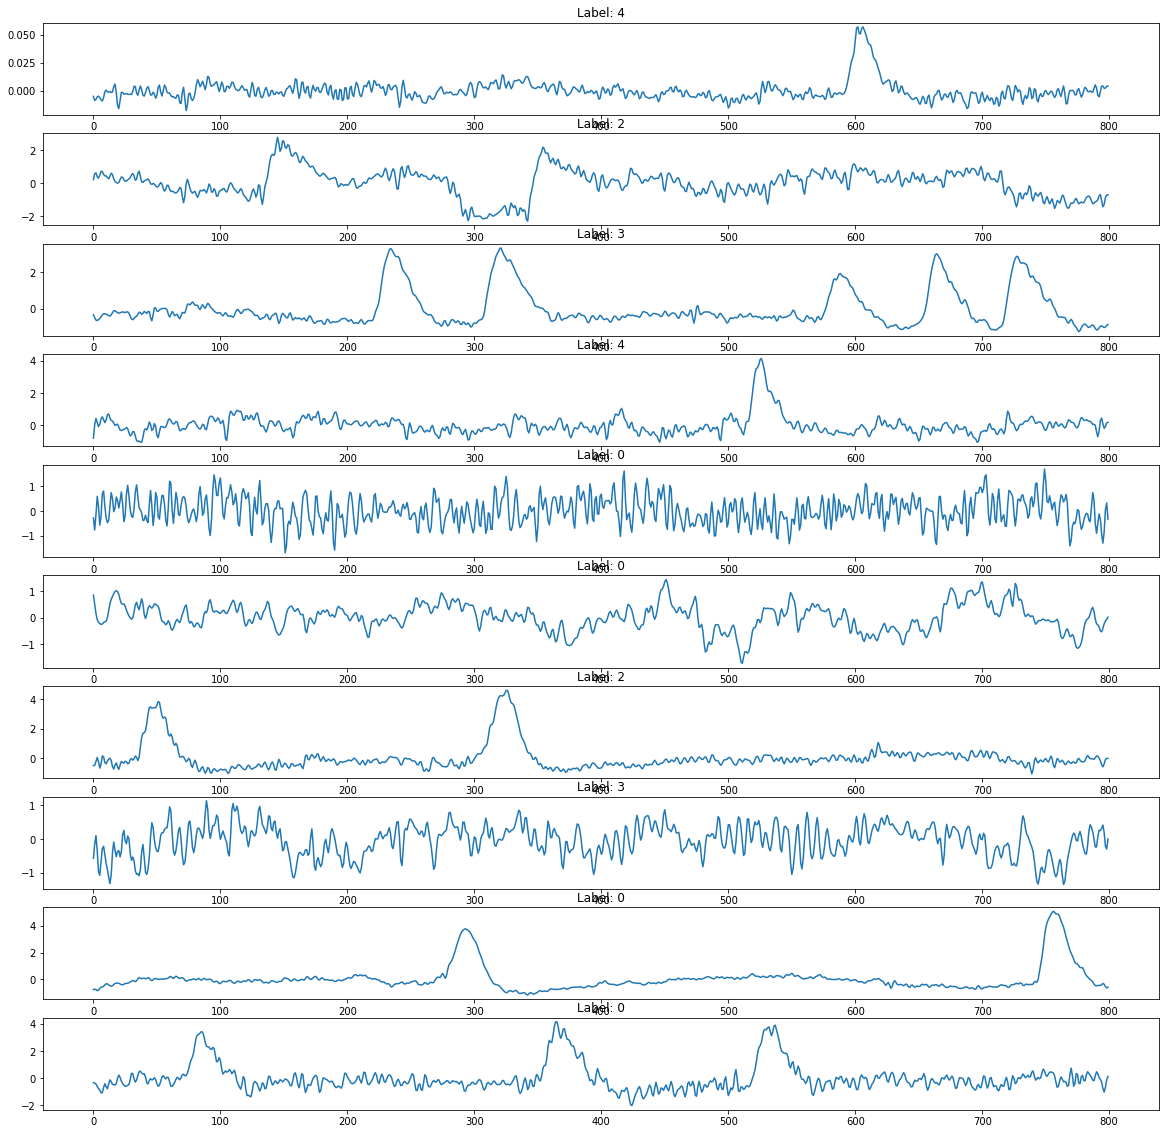

In [23]:
# Plot the first 10 samples (first channel only)
fig, axs = plt.subplots(10, 1, figsize=(20, 20))
for i in range(10):
    data, label = dataset[i]
    axs[i].plot(data[0])
    axs[i].set_title(f'Label: {label}')
plt.show()